### Модели разной сложности совершают разны ошибки обучения и ошибки обобщения

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [87]:
import pandas as pd

In [88]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [90]:
from sklearn.model_selection import train_test_split

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Формируем набор признаков и целевую переменную

In [92]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [93]:
Y = data['affair']

In [94]:
model = LogisticRegression()
model_tree = DecisionTreeClassifier()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [96]:
model.fit(X_train, Y_train)

LogisticRegression()

In [97]:
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

Получаем прогнозные значения модели (переменная predictions)

In [98]:
predictions = model.predict_proba(X_test)

In [99]:
predictions[:2]

array([[0.37442487, 0.62557513],
       [0.92523133, 0.07476867]])

In [100]:
model.score(X_train, Y_train)

0.7235188509874326

In [101]:
model.score(X_test, Y_test)

0.7319371727748691

In [102]:
model_tree.score(X_train, Y_train)

0.9497307001795332

In [103]:
model_tree.score(X_test, Y_test)

0.6602094240837696

### Оценка качества модели

Считаем accuracy последней модели

In [104]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [105]:
pred = model.predict(X_test)

In [106]:
tp, fp, fn, tn

(226, 131, 381, 1172)

In [107]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7319371727748691

In [108]:
precision = tp / (tp + fp)
precision

0.6330532212885154

In [109]:
recall = tp / (tp + fn)
recall

0.3723228995057661

In [110]:
from sklearn.metrics import recall_score, precision_score

In [111]:
recall_score(Y_test, pred)

0.3723228995057661

In [112]:
precision_score(Y_test, pred)

0.6330532212885154

Домашняя работа: "посчитать tpr и fpr в ноутбуке к лекции."

In [113]:
tpr_ = tp / (tp + fn)
tpr_

0.3723228995057661

In [114]:
fpr_ = fp / (fp + tn)
fpr_

0.10053722179585571

### ROC

In [115]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [116]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

Домашняя работа: сравнение вычисленных выше tpr и fpr с вычисленными методом roc_curve

In [117]:
import pandas as pd
rocdf = pd.DataFrame([fpr,tpr,thres]).T
rocdf.loc[(rocdf[2]<0.501) & (rocdf[2]>.499)]

,0,1,2
165,0.100537,0.370675,0.500999
166,0.100537,0.372323,0.500693


In [118]:
print(fpr_, tpr_) # результат совпадает

0.10053722179585571 0.3723228995057661


конец первой части домашнего задания ("Посчитать tpr и fpr в ноутбуке к лекции.")

In [119]:
for line in zip( fpr[:10], tpr[:10], thres[:10] ):
    print( line )

(0.0, 0.0, 1.9292091227263417)
(0.0, 0.0016474464579901153, 0.9292091227263417)
(0.0, 0.008237232289950576, 0.8999886290164443)
(0.0007674597083653108, 0.008237232289950576, 0.8977304723730306)
(0.0007674597083653108, 0.019769357495881382, 0.8650840084270532)
(0.0030698388334612432, 0.019769357495881382, 0.8547129963129159)
(0.0030698388334612432, 0.023064250411861616, 0.8544826980527306)
(0.003837298541826554, 0.023064250411861616, 0.8521926938166331)
(0.003837298541826554, 0.03130148270181219, 0.8338303409370348)
(0.004604758250191865, 0.03130148270181219, 0.8336073200838999)


In [120]:
import  matplotlib.pyplot as plt

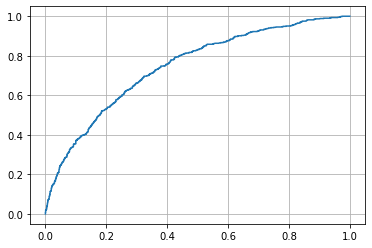

In [121]:
plt.plot( fpr, tpr )
plt.grid()

Начало второй части домашнего задания: "Убедиться, что график ROC AUC получается таким же, как и штатными средствами."

In [126]:
import numpy as np
def mystat(pred, test, N_steps=10):
    # dummyarray = np.empty((,1))
    _df = pd.DataFrame(index=range(0,N_steps), columns = ['tp','fp','fn','tn','thres','tpr','fpr','pr','re'])
    for _thres_idx in range(0, N_steps):
        tp = 0 # True positive
        fp = 0 # False positive
        fn = 0 # False negative
        tn = 0 # True negative
        
        for predicted_prob, actual in zip( pred, test ):
            _thres = float(_thres_idx)/N_steps
            if predicted_prob >= _thres:
                predicted = 1
            else:
                predicted = 0
            
            if predicted == 1:
                if actual == 1:
                    tp += 1
                else:
                    fp += 1
            
            else:
                if actual == 1:
                    fn += 1
                else:
                    tn += 1
        _df.iloc[_thres_idx].tp = tp
        _df.iloc[_thres_idx].fp = fp
        _df.iloc[_thres_idx].fn = fn
        _df.iloc[_thres_idx].tn = tn
        _df.iloc[_thres_idx].thres = _thres
        
        _df.iloc[_thres_idx].tpr = np.float64(tp) / (tp + fn)
        _df.iloc[_thres_idx].fpr = np.float64(fp) / (fp + tn)
        
        _df.iloc[_thres_idx].pr = np.float64(tp) / (tp + fp)
        _df.iloc[_thres_idx].re = np.float64(tp) / (tp + fn)
    return _df

        
statdf = mystat(predictions[:, 1], Y_test, N_steps=100)
statdf.head()

,tp,fp,fn,tn,thres,tpr,fpr,pr,re
0,607,1303,0,0,0.0,1.0,1.0,0.317801,1.0
1,607,1303,0,0,0.01,1.0,1.0,0.317801,1.0
2,607,1303,0,0,0.02,1.0,1.0,0.317801,1.0
3,607,1303,0,0,0.03,1.0,1.0,0.317801,1.0
4,607,1303,0,0,0.04,1.0,1.0,0.317801,1.0


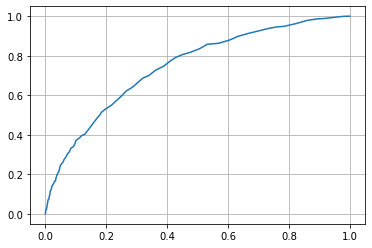

In [127]:
plt.plot( statdf.fpr, statdf.tpr ) # график выходит аналогичный
plt.grid()

Конец второй части домашнего задания: "Убедиться, что график ROC AUC получается таким же, как и штатными средствами."

Начало третьей части домашнего задания: "Построить график Precision - Recall на этих же данных."

(0.0, 1.0)

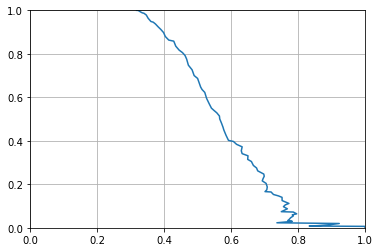

In [128]:
plt.plot(statdf.pr,statdf.re)
plt.grid()
plt.xlim(0,1)
plt.ylim(0,1)

Конец третьей части домашнего задания: "Построить график Precision - Recall на этих же данных."